In [80]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [82]:
from google.colab import files
file = files.upload()

Saving Student Mental health.csv to Student Mental health (2).csv


In [2]:
df = pd.read_csv('../datasets/Student Mental health.csv')
df.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df = df.drop(['Timestamp'], axis=1)
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
df.rename(columns = {
                        'Choose your gender' : 'Sex', 
                        'What is your course?' : 'Major', 
                        'Your current year of Study' : 'Year', 
                        'What is your CGPA?': 'GPA_Score',
                        'Do you have Depression?': 'Depression', 
                        'Do you have Anxiety?' : 'Anxiety', 
                        'Do you have Panic attack?' : 'Panic_Attack',
                        'Did you seek any specialist for a treatment?' : 'Take_Treatment', 
                        'Marital status' : 'Marital_status'
                    }, 
                    inplace = True)

In [9]:
print(len(df))

100


In [6]:
print(df.duplicated().sum())

0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Sex               0
Age               0
Major             0
Year              0
GPA_Score         0
Marital_status    0
Depression        0
Anxiety           0
Panic_Attack      0
Take_Treatment    0
dtype: int64

In [10]:
print("Length of gpa column: ", len(df['GPA_Score'].unique()))
print(df["GPA_Score"].unique())


Length of gpa column:  6
['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']


In [11]:
print("Length of course: ", len(df['Major'].unique()))
print(df['Major'].unique())


Length of course:  49
['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']


In [12]:
df['Take_Treatment'].unique()


array(['No', 'Yes'], dtype=object)

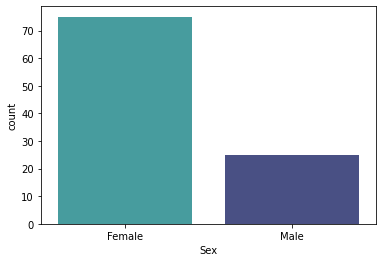

In [13]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex")
plt.show()


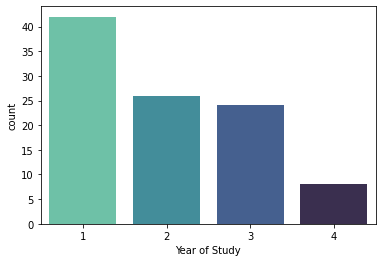

In [14]:
df['Year'] = df['Year'].replace(['year 1', 'year 2', 'year 3', 'year 4', 'Year 1', 'Year 2', 'Year 3', 'Year 4'], [1, 2, 3, 4,1,2,3,4])
sns.countplot(x='Year', data=df, palette="mako_r")
plt.xlabel("Year of Study")
plt.show()

In [15]:
df.describe()

,Age,Year
count,100.00000,100.000000
mean,20.53000,1.980000
std,2.49628,0.994734
min,18.00000,1.000000
25%,18.00000,1.000000
50%,19.00000,2.000000
75%,23.00000,3.000000
max,24.00000,4.000000


In [16]:
df.head()

,Sex,Age,Major,Year,GPA_Score,Marital_status,Depression,Anxiety,Panic_Attack,Take_Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


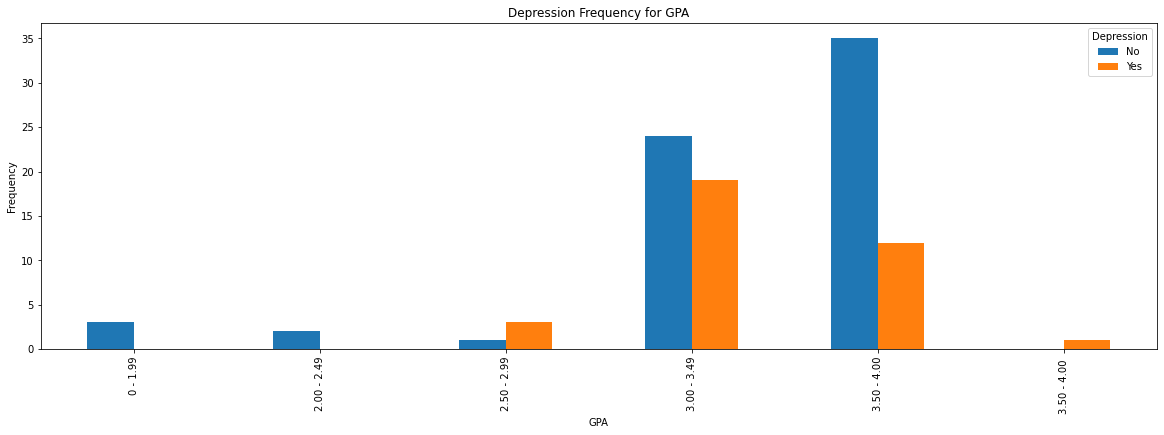

In [17]:
pd.crosstab(df['GPA_Score'], df['Depression']).plot(kind="bar", figsize=(20, 6))
plt.title('Depression Frequency for GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()


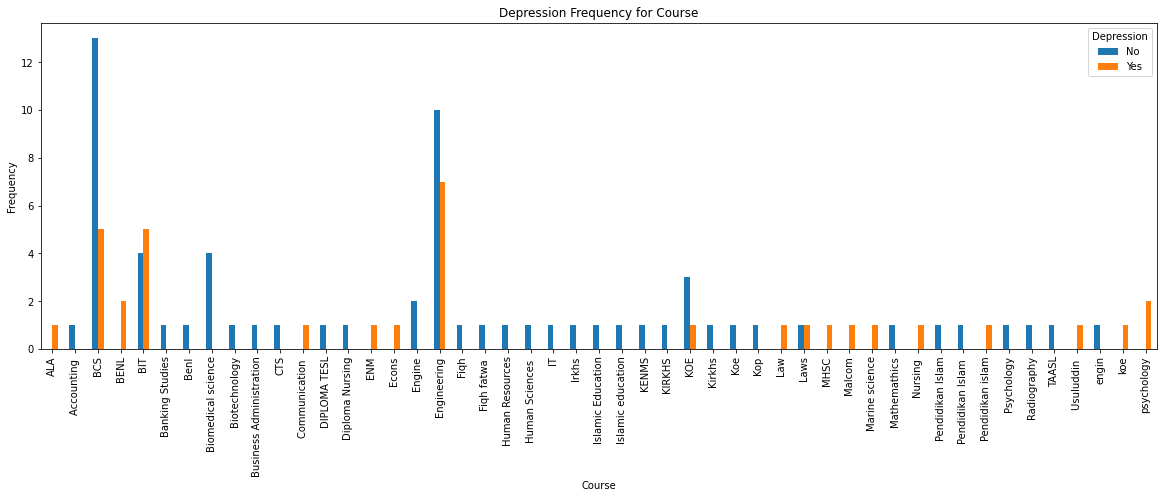

In [18]:
pd.crosstab(df['Major'], df['Depression']).plot(
    kind="bar", figsize=(20, 6))
plt.title('Depression Frequency for Course')
plt.xlabel('Course')
plt.ylabel('Frequency')
plt.show()


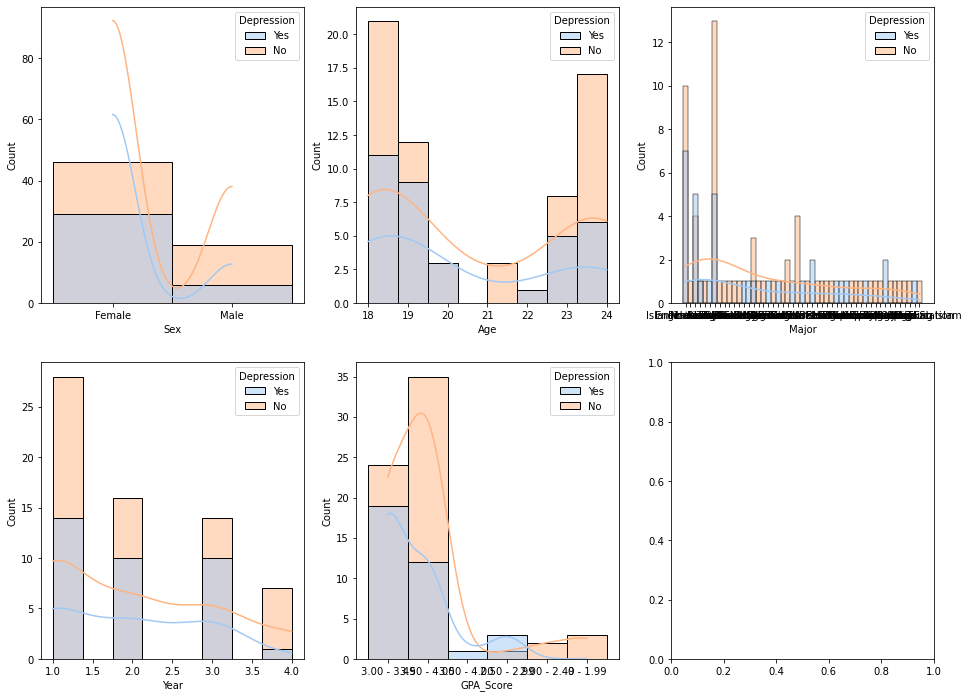

In [19]:
feature_cols = df.columns
sns.set_palette("pastel")
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
i = 0
for row in range(2):
    for col in range(3):
        if i <= 4:
            ax = axs[row, col]
            sns.histplot(
                data=df, x=feature_cols[i], hue='Depression', kde=True, ax=ax, color="Red")
            i += 1
        else:
            break

plt.show()


In [20]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['GPA_Score'] = labelencoder.fit_transform(df['GPA_Score'])
df['Marital_status'] = labelencoder.fit_transform(df['Marital_status'])
df['Depression'] = labelencoder.fit_transform(df['Depression'])
df['Anxiety'] = labelencoder.fit_transform(df['Anxiety'])
df['Panic_Attack?'] = labelencoder.fit_transform(df['Panic_Attack'])
df['Take_Treatment'] = labelencoder.fit_transform(df['Take_Treatment'])

In [22]:
courses = df['Major'].unique()

course2Id = {c: i + 2 for i, c in enumerate(courses)}
course2Id['Other'] = 0

id2Course = {i + 2 : c for i, c in enumerate(courses)}
id2Course[0] = "Other"

In [23]:
def encode(course):
    return course2Id[course]

df['Major'] = df['Major'].apply(lambda x: encode(x))


In [24]:
print(df['Major'].unique())

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50]


In [25]:
X = df.drop(['Depression'], axis=1)
y = df['Depression']

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42)


In [27]:
model_1 = LogisticRegression()
model_2 = RandomForestClassifier()


model = VotingClassifier(estimators=[('lr', model_1), ('rf', model_2)], voting='hard')

In [28]:
model_1 = LogisticRegression(solver='lbfgs',
                              multi_class='multinomial',
                             max_iter=200)
model_2 = RandomForestClassifier(
    n_estimators=100, random_state=1,  criterion='entropy', max_depth=5)
model1 = VotingClassifier(estimators=[('lr', model_1), ('rf', model_2)], voting='hard')

In [29]:
model_1 = RandomForestClassifier(
    n_estimators=100, random_state=1,  criterion='gini', max_depth=5)
model2 = BaggingClassifier(base_estimator=model_1, n_estimators=10, random_state=1)

In [33]:
X_train.head()

,Sex,Age,Major,Year,GPA_Score,Marital_status,Anxiety,Panic_Attack,Take_Treatment,Panic_Attack?
18,0,20.0,4,2,4,0,1,No,0,0
30,0,23.0,18,2,3,0,0,No,0,0
74,1,24.0,4,3,4,0,1,No,0,0
33,1,18.0,8,2,4,1,1,No,1,0
91,1,18.0,46,2,3,0,1,No,0,0


In [30]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'No'

In [ ]:
model1.fit(X_train, y_train)

In [ ]:
model2.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1-Score", metrics.f1_score(y_test, y_pred))


In [ ]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred1))
print("Precision", metrics.precision_score(y_test, y_pred1))
print("Recall", metrics.recall_score(y_test, y_pred1))
print("F1-Score", metrics.f1_score(y_test, y_pred1))


In [ ]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred2))
print("Precision", metrics.precision_score(y_test, y_pred2))
print("Recall", metrics.recall_score(y_test, y_pred2))
print("F1-Score", metrics.f1_score(y_test, y_pred2))


In [ ]:
print("Performance of model based on the test data:",
      model.score(X_test, y_test) * 100, "%")


In [ ]:
print("Performance of model based on the test data:",
      model1.score(X_test, y_test) * 100, "%")


In [ ]:
print("Performance of model based on the test data:",
      model2.score(X_test, y_test) * 100, "%")


In [ ]:
print(metrics.classification_report(y_test, y_pred, labels=np.unique(y_pred)))


In [ ]:
print(metrics.classification_report(y_test, y_pred1, labels=np.unique(y_pred1)))


In [ ]:
print(metrics.classification_report(y_test, y_pred2, labels=np.unique(y_pred2)))
